In [28]:
"""
Tshikana Rasehlomi
e-mail: rasehlomi@gmail.com
DS_CODE CHALLENGE
QUESTION 2: Time Series Challenge - Predict expected weekly service requests
10-07-2022
"""

# Load required modules
#==================================================================================
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# read and load the sr_hex.csv data and check the dataframe columns
#=========================================================================================
sr_hex_df = pd.read_csv('https://cct-ds-code-challenge-input-data.s3.af-south-1.amazonaws.com/sr_hex.csv.gz', compression='gzip', header=0, sep=',', quotechar='\"')
sr_hex_df.columns

Index(['notification_number', 'reference_number', 'creation_timestamp',
       'completion_timestamp', 'directorate', 'department', 'branch',
       'section', 'code_group', 'code', 'cause_code_group', 'cause_code',
       'official_suburb', 'latitude', 'longitude', 'h3_level8_index'],
      dtype='object')

In [5]:
#  we extract input dataframe to be used in our model development by dropping unwanted columns and check the first rows of new dataframe
#======================================================================================================================================
sr_hex_mod = sr_hex_df.drop(['reference_number', 'completion_timestamp',
       'directorate', 'department', 'branch', 'section', 'latitude', 'creation_timestamp',
       'longitude', 'h3_level8_index'], axis=1)
sr_hex_mod.reset_index(inplace=True)
sr_hex_mod.head()

,index,notification_number,code_group,code,cause_code_group,cause_code,official_suburb
0,0,400583534,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Wear and tear,MONTAGUE GARDENS
1,1,400555043,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,SOMERSET WEST
2,2,400589145,TD Customer complaint groups,Manhole Cover/Gully Grid,Road (RCL),Vandalism,STRAND
3,3,400538915,TD Customer complaint groups,Paint Markings Lines&Signs,Road Markings,Wear and tear,RAVENSMEAD
4,4,400568554,TD Customer complaint groups,Pothole&Defect Road Foot Bic Way/Kerbs,Road (RCL),Surfacing failure,CLAREMONT


In [6]:
# we then convert categorical fields to numerical values to be used in model development
#=======================================================================================================================
number = LabelEncoder()
sr_hex_mod['code'] = number.fit_transform(sr_hex_mod['code'].astype('str'))
sr_hex_mod['cause_code'] = number.fit_transform(sr_hex_mod['cause_code'].astype('str'))
sr_hex_mod['code_group'] = number.fit_transform(sr_hex_mod['code_group'].astype('str'))
sr_hex_mod['official_suburb'] = number.fit_transform(sr_hex_mod['official_suburb'].astype('str'))
sr_hex_mod['notification_number'] = number.fit_transform(sr_hex_mod['notification_number'].astype('str'))
sr_hex_mod['cause_code_group'] = number.fit_transform(sr_hex_mod['cause_code_group'].astype('str'))
print(sr_hex_mod.head())

   index  notification_number  code_group  code  cause_code_group  cause_code  \
0      0               931912          25   297                31         179   
1      1               918735          25   220                31         166   
2      2               934454          25   220                31         166   
3      3               914417          25   280                32         179   
4      4               924889          25   297                31         148   

   official_suburb  
0              440  
1              619  
2              651  
3              544  
4              148  


In [8]:
# we define a way to handle the official suburb in the datasets
#=====================================================================================================
def compute_service(x):
    accept = [range(0,8)]
    if x not in accept:
        return 0
    else:
        return x
    
sr_hex_mod['official_suburb'] = sr_hex_mod['official_suburb'].apply(compute_service)

In [9]:
# we define independent and dependent variables from our data prepared for model development
#========================================================================================================
y = sr_hex_mod['code'].values
X = sr_hex_mod.values

In [13]:
# Split data into training and test samples of 80%-20%
#==========================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=0)

In [18]:
# we compute a RandomForest classifier by providing number of trees (n_estimators) and
# minimum number of samples required to be at a leaf node for the tree (min_samples_leaf)
#==============================================================================================================
Rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=5, random_state=0)
Rf.fit(X_train, y_train)
y_pred = Rf.predict(X_test)
print(y_pred)

[291  36 239 ...  63 124 239]


   Actual  Predicted
0     291        291
1      36         36
2     239        239
3     239        239
4     367        367


C:\Users\TRasehlomi.TRASEHLOMI-NB\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\TRasehlomi.TRASEHLOMI-NB\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


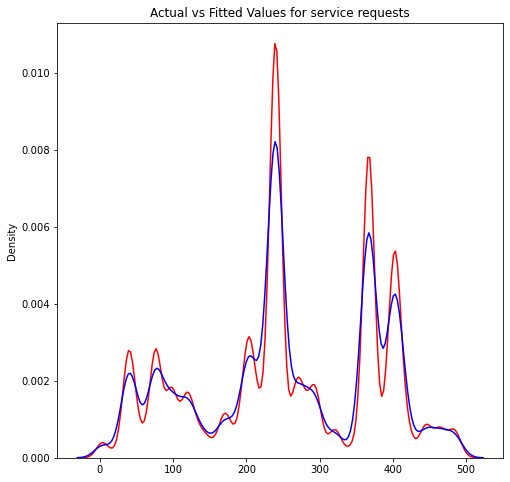

In [32]:
# check the difference between predicted vs actual service requests
#====================================================================================================================

diff =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(diff.head())

# let's visualize these difference on a graph
#=====================================================================================================================

plt.figure(figsize=(8, 8))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for service requests')
plt.show()
plt.close()

In [27]:
# evaluate model performance and once happy use it to predict the service request per hex for the next 4 weeks
#==============================================================================================================
print('Accuracy: ', accuracy_score(y_test, y_pred)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy:  99.06386232457375
Mean Absolute Error: 0.09613597625406872
Mean Squared Error: 3.723072103309669
Root Mean Squared Error: 1.9295263935250198


In [44]:
# our model achieved 99% accuracy which is greater than the initial target of 95%
# we confidently use it to predicted expected service requests per hex for next 4 weeks (roughly 28 days)
# using our model we make a one-step prediction

y_pred = Rf.predict(X_test)

expected_service_requests = y_pred[28]

print(expected_service_requests)


291
